In [28]:
# Import all necessary modules.
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [29]:
# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando exemplos da função a ser mapeada.

$$y = x^2, -1 \leq x \leq 1$$

In [36]:
# Number of examples.
N = 1000

# Attribute.
x = np.linspace(-1,1,N).reshape(N,1)

# Function to be approximated.
y = x**2

### Plotando a função.

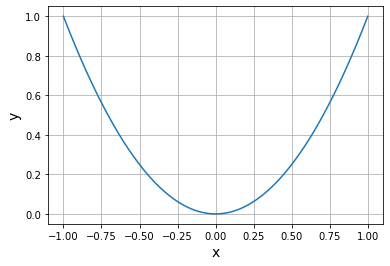

In [37]:
plt.plot(x,y)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()

### Dividindo os exemplos em conjuntos de treinamento e validação.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

### Aproximando a função com um MLP.

+ A classe MLPRegressor é usada para aproximar a função.
+ Usamos k-Fold, com $k = 10$, como técnica de validação cruzada para encontrar o melhor número de nós.
+ Variamos também a semente pois lembrem-se que a inicialização dos pesos da rede afeta o seu treinamento.

In [33]:
# Hyperparameters to be checked. 
parameters = {
    'hidden_layer_sizes':[(2,),(4,),(8,),(10,),(15,),(20,),(40,),(50,),(100,)],
    'random_state':[0,1,13,17,42,51,69,81,89,99] 
}

# Instantiate MLPregressor.
reg = MLPRegressor(activation='logistic', max_iter=5000, solver='lbfgs')

# Instantiate GridSearchCV.
clf = GridSearchCV(reg, parameters, cv=10)

# Train the MLP regressor with grid search.
clf.fit(x_train, y_train.ravel())

GridSearchCV(cv=10,
             estimator=MLPRegressor(activation='logistic', max_iter=5000,
                                    solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [(2,), (4,), (8,), (10,), (15,),
                                                (20,), (40,), (50,), (100,)],
                         'random_state': [0, 1, 13, 17, 42, 51, 69, 81, 89,
                                          99]})

### Imprime os melhores valores encontrados pelo Grid Search.

In [34]:
print(clf.best_params_)

{'hidden_layer_sizes': (8,), 'random_state': 51}


### Compara a função original e sua aproximação.

MSE: 7.654718124792602e-06


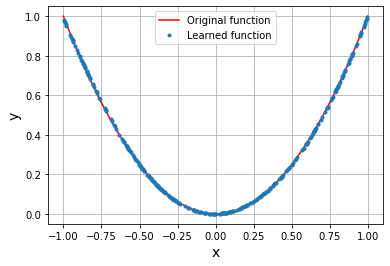

In [42]:
# Prediction with trained model and validation set.
y_pred = clf.predict(x_test)

# Calculate the mean squared error.
mse = mean_squared_error(y_pred, y_test)
print('MSE:',mse)

# Plot the comparison between predicted and original functions.
plt.plot(x,y,'r',label='Original function')
plt.plot(x_test,y_pred,'.',label='Learned function')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid()
plt.show()